In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [10]:
symptoms1 = pd.read_csv("symptoms1.csv", delimiter=";", decimal=".")
symptoms2 = pd.read_csv("symptoms2.csv", delimiter=";", decimal=".")
training = pd.read_csv("training.csv", delimiter=";", decimal=".")

In [11]:
symptoms1

,FeatureName,Timestamp,Value,Note
0,neck pain left side,2020-06-27T10:18:01.411+02:00,3.0,NaN
1,neck pain left side,2020-06-22T09:43:40.675+02:00,3.0,NaN
2,neck pain left side,2020-06-18T12:23:52.494+02:00,3.0,NaN
3,neck pain left side,2020-06-03T09:00:09.347+02:00,3.0,NaN
4,pain over left ear,2020-06-28T13:27:24.278+02:00,3.0,NaN
5,pain over left ear,2020-06-28T10:41:53.159+02:00,3.0,NaN
6,pain over left ear,2020-06-27T22:53:48.677+02:00,3.0,NaN
7,pain over left ear,2020-06-27T20:30:46.235+02:00,4.0,NaN
8,pain over left ear,2020-06-27T20:13:09.612+02:00,4.0,NaN
9,pain over left ear,2020-06-27T17:34:51.422+02:00,3.0,NaN


In [12]:
training['Date'] = pd.to_datetime(training.Date, format = '%d-%m-%Y %H:%M')

symptoms1['Timestamp'] = pd.to_datetime(symptoms1.Timestamp, format = '%Y-%m-%dT%H:%M:%S.%f%z')

symptoms2['Timestamp'] = pd.to_datetime(symptoms1.Timestamp, format = '%Y-%m-%dT%H:%M:%S.%f%z')

symptoms1.dtypes



FeatureName                                   object
Timestamp      datetime64[ns, pytz.FixedOffset(120)]
Value                                        float64
Note                                          object
dtype: object

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2020-06-27 10:18:01.411000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-22 09:43:40.675000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-18 12:23:52.494000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-03 09:00:09.347000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-28 13:27:24.278000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-28 10:41:53.159000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 22:53:48.677000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 20:30:46.235000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 20:13:09.612000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 17:34:51.422000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 07:42:02.762000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-27 07:38:56.006000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-26 22:38:58.142000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-26 20:38:13.579000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-26 14:30:30.598000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-26 09:54:11.632000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-25 22:48:03.134000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-25 11:01:46.184000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-25 09:04:59.355000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-24 15:26:36.490000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-24 11:10:57.963000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-23 22:59:38.695000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-23 11:01:31.344000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-23 09:16:00.290000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-22 17:28:28.463000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-21 17:06:41.201000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-21 12:51:29.075000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-21 10:19:56.711000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-21 09:11:07.100000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-20 16:30:18.495000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-20 11:55:24.691000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-18 10:14:36.602000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-18 07:59:18.775000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-16 16:22:05.243000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-15 09:48:08.468000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 22:49:28.745000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 21:09:01.635000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 19:00:39.307000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 18:06:26.480000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 17:34:14.354000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-14 14:32:21.451000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-13 20:22:37.823000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-13 19:01:55.787000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-13 17:27:24.165000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-12 09:47:32.688000+0200', tz='pytz.FixedOffset(120)'),
       Timestamp('2020-06-11 22:49:44.447000+0200', tz='pytz.FixedOffset(120)'),
       NaT], dtype=object)

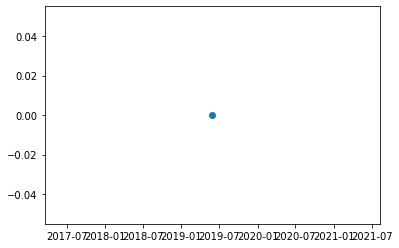

In [13]:
#plt.plot_date(symptoms1.Timestamp, symptoms1.Value)
plt.plot_date(datetime(2019, 5, 28), 0)
plt.plot_date(symptoms1.Timestamp, symptoms1.Value)
